In [9]:
import thinkdsp as td
import numpy as np

class WeiTrombone(td.Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.
        ts: float array of times
        returns: float wave array
        """
        l1, l2=  1.0/self.start, 1.0/self.end
        lengths= np.linspace(l1, l2, len(ts)-1)
        freqs=   1/lengths
        return self._evaluate(ts, freqs)

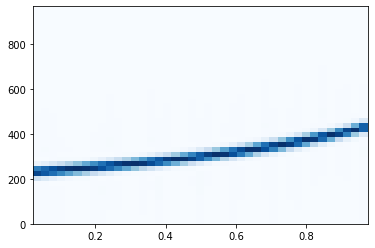

In [10]:
A3=  220 
E3=  330
A4=  440

s1= WeiTrombone(start= A3, end= A4)
w1= s1.make_wave(duration=1)
w1.make_spectrogram(512).plot(high=1000)
w1.make_audio()


In [11]:
s2= WeiTrombone(start= A4, end= E3)
w2= s2.make_wave(duration=1)
w2.make_audio()

In [12]:
w3= w1|w2
w3.make_audio()

In [6]:
r= 2**(1/12)

[A,A1,B,C,C1,D,D1,E,F,F1,G,G1,a]= \
[440*r**i for i in range(12+1)]

In [13]:
song= [A,A,E,E,F1,F1,E,E]

s= WeiTrombone(song[0],song[1]).make_wave(.5)
for x in song[1:]:
    s= (s|WeiTrombone(x,x).make_wave(.5))

In [14]:
s.make_audio()

In [22]:
import thinkdsp as td

x= td.UncorrelatedGaussianNoise()
x= x.make_wave(duration= 1, framerate= 10000)
x

In [23]:
x.ts, x.ys
x.ys.shape

(10000,)

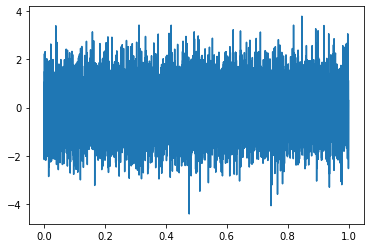

In [24]:
import matplotlib.pyplot as pl
pl.plot(x.ts, x.ys)

In [25]:
x.ys.max(), x.ys.mean(), x.ys.std()

(3.7969205940767803, -0.0028180673045012823, 1.0150994978941437)

In [26]:
sx= x.make_spectrum()
sx.fs, sx.hs 
sx.hs.shape

(5001,)

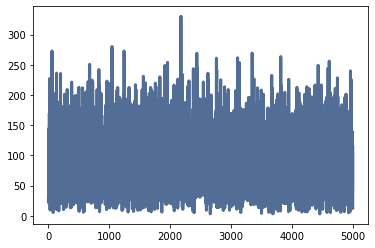

In [27]:
sx.plot()

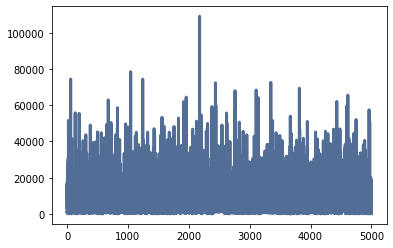

In [42]:
sx.plot_power()

In [29]:
Sx= sx.make_integrated_spectrum()
Sx.cs.shape

(5001,)

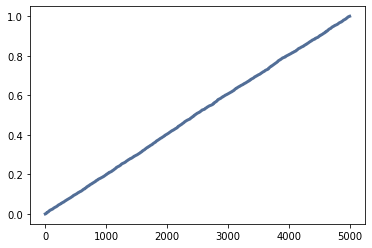

In [41]:
Sx.plot_power()

In [36]:
Sx.estimate_slope()

LinregressResult(slope=0.9862150803231964, intercept=-8.416376781219565, rvalue=0.9994736453890444, pvalue=0.0, stderr=0.00045279249960029975)


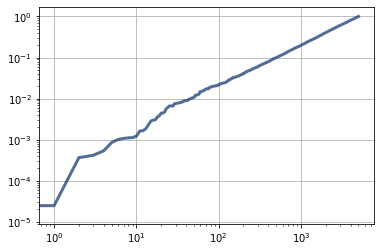

In [40]:
Sx.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [37]:
Sx.estimate_slope()

LinregressResult(slope=0.9862150803231964, intercept=-8.416376781219565, rvalue=0.9994736453890444, pvalue=0.0, stderr=0.00045279249960029975)


In [38]:
y= x.cumsum()
x.ys.shape, y.ys.shape

((10000,), (10000,))

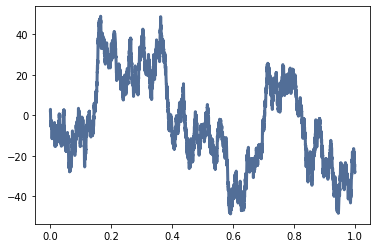

In [39]:
y.plot()

In [53]:
y.ys.max(), y.ys.mean(), y.ys.std()

(70.35717861246674, -76.9233897578204, 62.92925466714424)


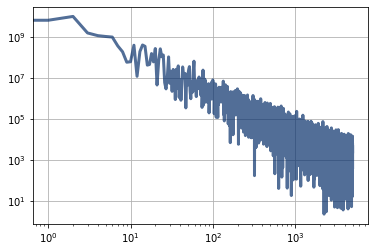

In [44]:
sy= y.make_spectrum()
sy.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [54]:
sy.make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.0005718402501891253, intercept=-0.004449672818712793, rvalue=0.3375354562055031, pvalue=1.7616356363096213e-133, stderr=2.2557510407220237e-05)


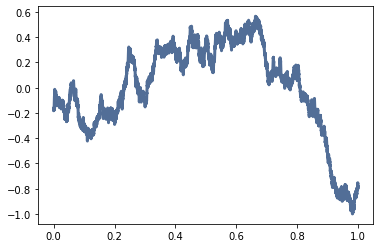

In [49]:
z= td.BrownianNoise().make_wave(duration=1, framerate=10000)
z.plot()

In [51]:
print("(70.35717861246674, -76.9233897578204, 62.92925466714424)")

(70.35717861246674, -76.9233897578204, 62.92925466714424)


In [43]:
aUrl= 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1588550400&interval=1d&events=history'
import pandas as pd
df= pd.read_csv(aUrl)

In [44]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23188,2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
23189,2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
23190,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
23191,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000


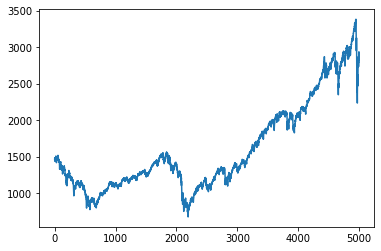

In [45]:
ys= df['Close'].values
ys= ys[-5000:]
pl.plot(ys)

In [49]:
yWave= td.Wave(ys, framerate= 10000)

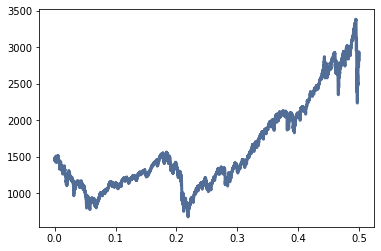

In [47]:
yWave.plot()

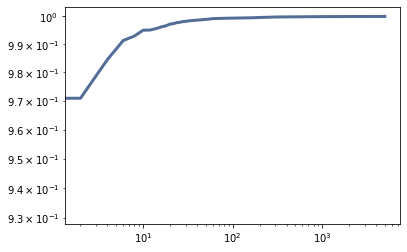

In [48]:
yWave.make_spectrum().make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')

In [50]:
yWave.make_spectrum().make_integrated_spectrum().estimate_slope()

ValueError: Inputs must not be empty.